## **Task : Exploratory Data Analysis of IPL**

#### Author: Mugilan K S

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [3]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [7]:
total_win = matches.groupby('winner')['winner'].count().reset_index(name = 'count')
team_wins = total_win.sort_values(by='count',ascending = False)
team_wins

,winner,count
8,Mumbai Indians,109
0,Chennai Super Kings,100
7,Kolkata Knight Riders,92
13,Royal Challengers Bangalore,84
5,Kings XI Punjab,82
10,Rajasthan Royals,75
3,Delhi Daredevils,67
14,Sunrisers Hyderabad,58
1,Deccan Chargers,29
4,Gujarat Lions,13


## Number of Wins by Each Team

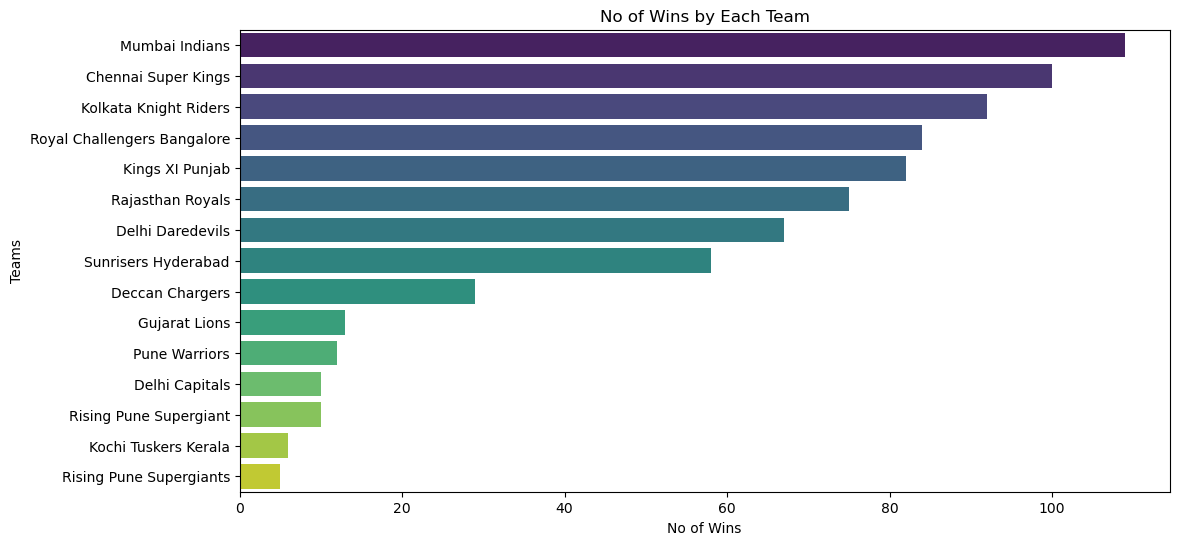

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(data =team_wins,y= 'winner', x='count',palette="viridis")
plt.title('No of Wins by Each Team')
plt.xlabel('No of Wins')
plt.ylabel('Teams')
plt.show()

#### Inference : The bar chart indicates that the Mumbai Indians have the highest number of wins in the league, while the Rising Pune Supergiants have the lowest.

In [8]:
batsman_runs = deliveries.groupby('batsman')['batsman_runs'].sum().reset_index(name = 'Total_Sum')
top_10_batsman = batsman_runs.sort_values(by='Total_Sum',ascending = False).head(10)
top_10_batsman

,batsman,Total_Sum
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632
92,CH Gayle,4560
290,MS Dhoni,4477
384,RV Uthappa,4446
26,AB de Villiers,4428
147,G Gambhir,4223


## Top 10 Batsmen by Runs

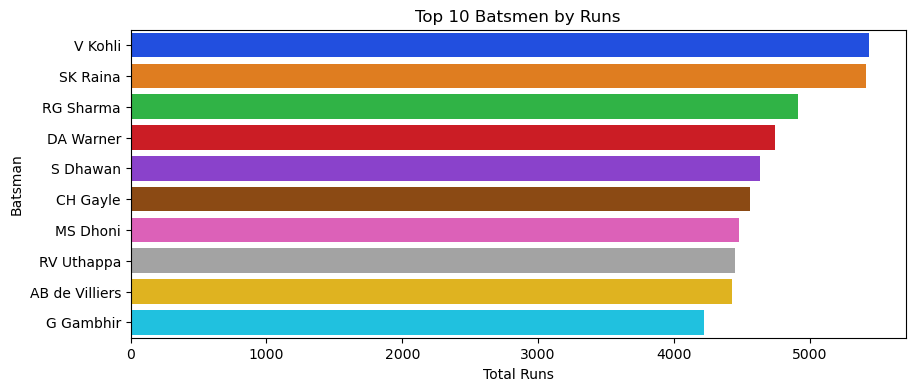

In [39]:
plt.figure(figsize=(10,4))
sns.barplot(data =top_10_batsman,y= 'batsman', x='Total_Sum',palette="bright")
plt.title('Top 10 Batsmen by Runs')
plt.ylabel('Batsman')
plt.xlabel('Total Runs')
plt.show()

#### Inference: The bar graph shows V Kohli leads the chart with nearly 5000 runs, followed by SK Raina and RG Sharma, indicating their dominance in run-scoring. The graph shows a  a significant gap between the top scorer and the rest.

In [10]:
bowlers = deliveries.groupby('bowler')['player_dismissed'].count().reset_index(name = 'Total_Count')
top_10_bowlers = bowlers.sort_values(by='Total_Count',ascending = False).head(10)
top_10_bowlers

,bowler,Total_Count
340,SL Malinga,188
93,DJ Bravo,168
7,A Mishra,165
126,Harbhajan Singh,161
264,PP Chawla,156
53,B Kumar,141
269,R Ashwin,138
347,SP Narine,137
381,UT Yadav,136
281,R Vinay Kumar,127


## Top 10 Bowlers by wickets

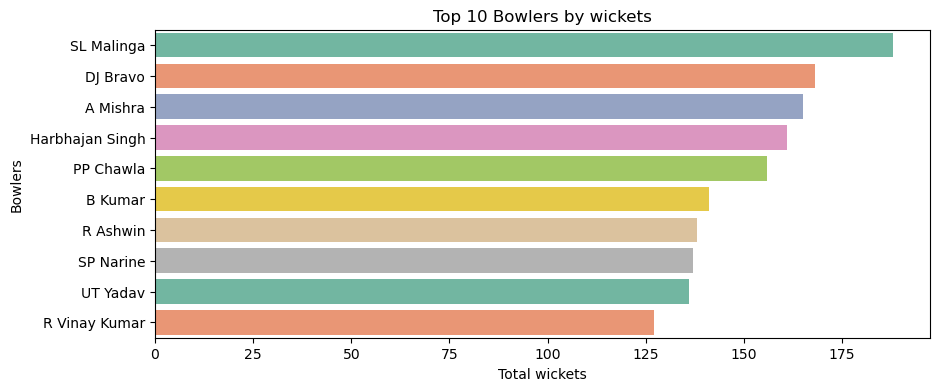

In [44]:
plt.figure(figsize=(10,4))
sns.barplot(data =top_10_bowlers,y= 'bowler', x='Total_Count',palette="Set2")
plt.title('Top 10 Bowlers by wickets')
plt.ylabel('Bowlers')
plt.xlabel('Total wickets')
plt.show()

#### Inference: The bar graph shows SL Malinga leads the chart with the highest number of wickets, followed by DJ Bravo and A Mishra, indicating their proficiency in taking wickets. 

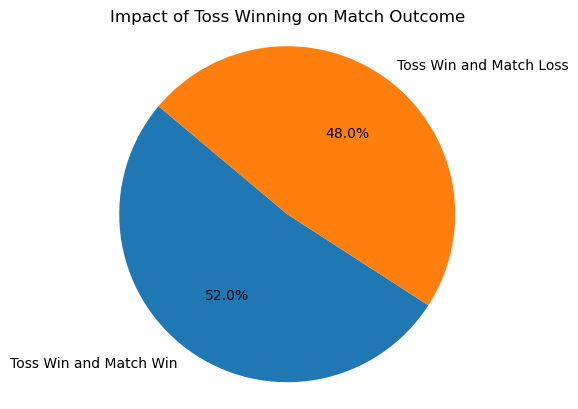

In [11]:
TossWin_MatchWin = matches[matches['toss_winner'] == matches['winner']].shape[0]
TossWin_MatchLoss = matches[matches['toss_winner'] != matches['winner']].shape[0]


labels = ['Toss Win and Match Win', 'Toss Win and Match Loss']
sizes = [TossWin_MatchWin, TossWin_MatchLoss]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Impact of Toss Winning on Match Outcome')
plt.axis('equal')
plt.show()

#### Inference: The pie chart shows that winning the toss in a cricket match slightly increases the chances of winning the match. However, the difference is small, with 52% of toss winners also winning the match and 48% losing. So, while the toss might give a slight edge, it’s not the main factor in winning a match.